## Практикум по Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
# метод aggregate появился в версии Pandas 0.20.0
# если выдается ошибка AttributeError: 'DataFrame' object has no attribute 'aggregate', то надо обновить Pandas:
# conda update pandas
# или conda update conda

In [3]:
# если вы запускаете notebook в другом ядре (например, питон 3.6 при основной версии питона на компьютере 2.7), то
# обновляем версию Pandas для этого ядра:
# смотрим какие ядра установлены: conda info --envs
# активируем нужное ядро: source activate python3 (в Windows команда без source)
# обновляем Pandas: conda update pandas

In [4]:
# проверяем версию Pandas
pd.__version__

'0.22.0'

### Создание DataFrame из листов и словарей

In [5]:
dataList = [
    { 'date': '2017-07-01', 'value': 100 },
    { 'date': '2017-07-02', 'value': 200 },
    { 'date': '2017-07-03', 'value': 300 },
    { 'date': '2017-07-04', 'value': 400 },
    { 'date': '2017-07-05', 'value': 500 },
]

In [6]:
pd.DataFrame( dataList )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


In [7]:
# то же самое, но в другом виде
# задаем столбцы

dataDict = {
    'date': [ '2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05' ],
    'value': [ 100, 200, 300, 400, 500 ]
}

pd.DataFrame.from_dict( dataDict )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


In [8]:
# для сохранения порядка следования элементов можем использовать лист вместо словаря

dataDict = [
    ( 'date', [ '2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05' ] ),
    ( 'value', [ 100, 200, 300, 400, 500 ] )
]

pd.DataFrame.from_items( dataDict )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


In [9]:
# лист кортежей с указанием заголовков
dataLists = [
    ('2017-07-01', 100),
    ('2017-07-02', 200),
    ('2017-07-03', 300),
    ('2017-07-04', 400),
    ('2017-07-05', 500),
]

headers = [ 'date', 'value' ]
pd.DataFrame.from_records( dataLists, columns = headers )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


### Создание Series

In [10]:
# можно использовать Numpy для генерации данных
dataNP = np.random.rand( 3 )

In [11]:
dataNP

array([0.90195874, 0.95848597, 0.98391956])

In [12]:
pd.Series( dataNP, index = [ 'first', 'second', 'third' ] )

first     0.901959
second    0.958486
third     0.983920
dtype: float64

### Импорт данных для DataFrame из файлов

In [13]:
data = pd.read_csv('train.csv', delimiter=',')

In [14]:
data.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
# указываем разделитель столбцов в файле
# заголовок у файла есть, но можно задать свои названия (удобно, если изначально они на русском)
# выводим первые 10 строк

data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
# основная информация о нашем DataFrame
# хорошо показывает в каких данных много пропусков
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Столбцы SibSp и Parch (наличие родственников среди пассажиров) распознаны как целое число. Если недо это исправить, то используем dtype:

In [18]:
data = pd.read_csv( 'train.csv', delimiter = ',', dtype = {'SibSp': str, 'Parch': str} )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


In [19]:
# статистика DataFrame
# вывод зависит от типа данных
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

data.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


### Распределение значений столбца

In [20]:
type(data['Pclass'])

pandas.core.series.Series

In [21]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Гистограмма распределения

In [22]:
# рисуем в браузере
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000093506A0>]],
      dtype=object)

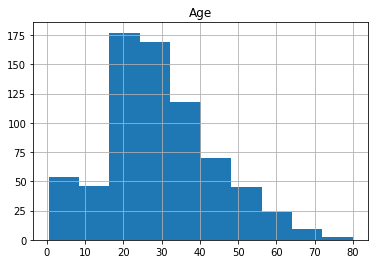

In [23]:
data.hist( column = ['Age'] )

Можно и так:

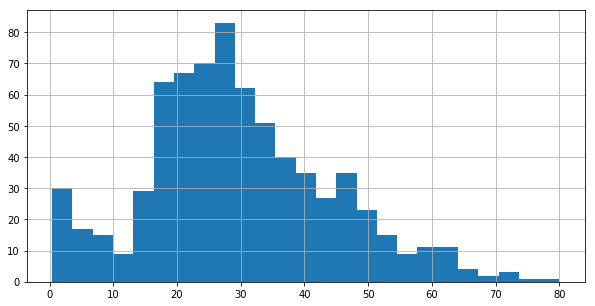

In [24]:
data['Age'].hist(bins = 25, figsize = (10, 5))

### Упражнение

Загрузите в датафрейм mountains содержимое файла Mountains.csv. Посчитайте следующие показатели:
1. Минимальную и максимальную высоту гор в этом наборе

2. В каком году было впервые покорено наибольшее количество вершин (столбец First ascent)?

3. Постройте распределение распределение First ascent по годам

In [25]:
mountains = pd.read_csv('mountains.csv', delimiter=',')
mountains

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0
5,6,Cho Oyu,8188,26864,2340,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28.0
6,7,Dhaulagiri I,8167,26795,3357,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿,K2,1960,51,39.0
7,8,Manaslu,8163,26781,3092,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49,45.0
8,9,Nanga Parbat,8126,26660,4608,Nanga Parbat Himalaya,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953,52,67.0
9,10,Annapurna I,8091,26545,2984,Annapurna Himalaya,28°35′44″N 83°49′13″E﻿,Cho Oyu,1950,36,47.0


Классифицируйте высоту гор и посчитайте распределение количества вершин по этой классификации:
* высота до 7500 метров - High
* до 8000 метров - Very high
* более 8000 метров - Extremely high

In [26]:
def ageGroup( row ):
    """
    Простая функция отнесения возраста к группе
    """
    
    # проверяем, что значение возраста не равно NaN
    if not pd.isnull( row['Age'] ):
        if row['Age'] <= 18:
            return 'Child'

        if row['Age'] >= 65:
            return 'Retiree'

        return 'Young'
    
    # если значение возраста NaN, то возвращаем Undef
    return 'Undef'


def mount_class( row ):
    if not pd.isnull( row['Height (m)']):
        if row['Height (m)'] <= 7500:
            return 'high'
        if row['Height (m)'] >= 8000:
            return 'Extremely high'
        return 'Very high'
    return 'Undef'

mountains['Class'] = mountains.apply(mount_class, axis = 1)
mountains

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004,Class
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0,Extremely high
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0,Extremely high
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0,Extremely high
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0,Extremely high
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0,Extremely high
5,6,Cho Oyu,8188,26864,2340,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28.0,Extremely high
6,7,Dhaulagiri I,8167,26795,3357,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿,K2,1960,51,39.0,Extremely high
7,8,Manaslu,8163,26781,3092,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49,45.0,Extremely high
8,9,Nanga Parbat,8126,26660,4608,Nanga Parbat Himalaya,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953,52,67.0,Extremely high
9,10,Annapurna I,8091,26545,2984,Annapurna Himalaya,28°35′44″N 83°49′13″E﻿,Cho Oyu,1950,36,47.0,Extremely high


In [27]:
mountains.describe()

,Rank,Height (m),Height (ft),Prominence (m),Failed attempts bef. 2004
count,118.000000,118.000000,118.000000,118.000000,115.000000
mean,59.500000,7578.042373,24862.364407,1671.567797,8.400000
std,34.207699,341.471211,1120.311905,1234.813419,15.782958
min,1.000000,7200.000000,23622.000000,217.000000,0.000000
25%,30.250000,7316.500000,24004.000000,712.750000,1.000000
50%,59.500000,7472.500000,24516.500000,1332.500000,3.000000
75%,88.750000,7775.500000,25509.750000,2297.250000,11.000000
max,118.000000,8848.000000,29029.000000,8848.000000,121.000000


In [28]:
mountains['First ascent'].value_counts()[0]

7

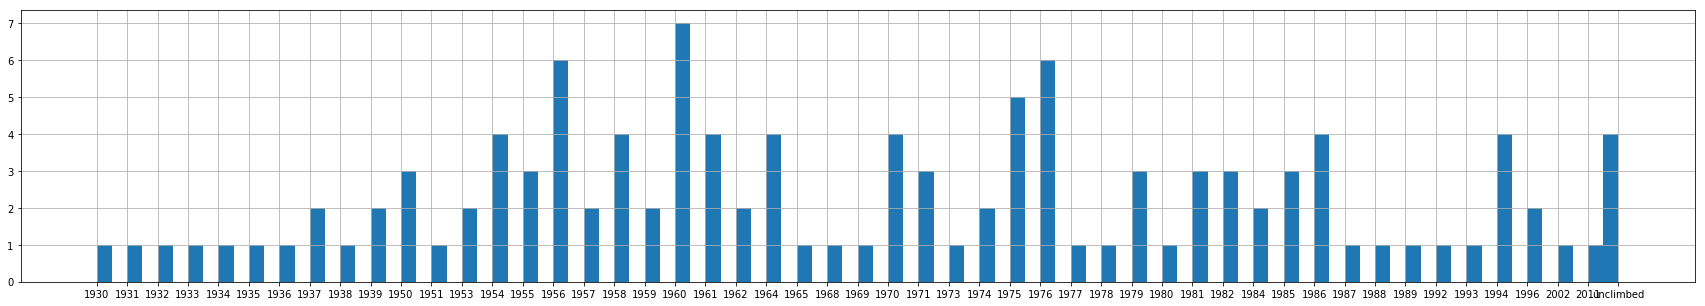

In [29]:
# mountains.hist( column = ['First ascent'] )
mountains['First ascent'].hist(bins = 100, figsize = (30, 5))

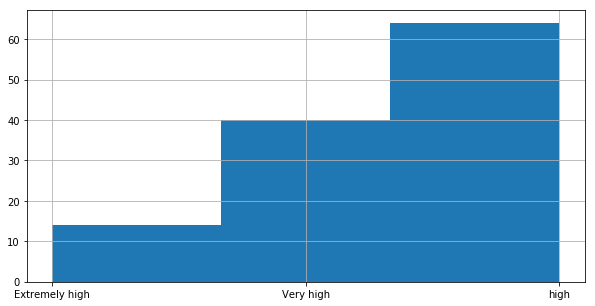

In [30]:
mountains['Class'].hist(bins = 3, figsize = (10, 5))

### Поэлементные действия с DataFrame

In [31]:
# зададим два DataFrame

df1 = pd.DataFrame( [ (0, 1), (2, 3), (4, 5) ], columns = [ 'value1', 'value2' ] )
df1

,value1,value2
0,0,1
1,2,3
2,4,5


In [32]:
df2 = pd.DataFrame( [ (10, 11), (12, 13), (14, 15), (17, 18) ], columns = [ 'value1', 'value3' ] )
df2

,value1,value3
0,10,11
1,12,13
2,14,15
3,17,18


In [33]:
# функция сложения
df1.add( df2 )

,value1,value2,value3
0,10.0,NaN,NaN
1,14.0,NaN,NaN
2,18.0,NaN,NaN
3,NaN,NaN,NaN


In [34]:
# для несовпадающих строк используем значение из fill_value
df1.add( df2, fill_value = 100 ).fillna(0)

,value1,value2,value3
0,10.0,101.0,111.0
1,14.0,103.0,113.0
2,18.0,105.0,115.0
3,117.0,0.0,118.0


### mul - перемножение

In [35]:
df1.mul( df2, fill_value = 0 )

,value1,value2,value3
0,0.0,0.0,0.0
1,24.0,0.0,0.0
2,56.0,0.0,0.0
3,0.0,NaN,0.0


### div - поэлементное деление DataFrame

In [36]:
df1.div( df2, fill_value = 17 )

,value1,value2,value3
0,0.000000,0.058824,1.545455
1,0.166667,0.176471,1.307692
2,0.285714,0.294118,1.133333
3,1.000000,NaN,0.944444


### Разность DataFrame

In [37]:
df1.sub( df2 )

,value1,value2,value3
0,-10.0,NaN,NaN
1,-10.0,NaN,NaN
2,-10.0,NaN,NaN
3,NaN,NaN,NaN


### Корректное копирование DataFrame

In [38]:
# зададим DataFrame

df1 = pd.DataFrame( [ (0, 1) ], columns = [ 'value1', 'value2' ] )
df1

,value1,value2
0,0,1


In [39]:
# делаем его "копию"

df2 = df1

In [40]:
# Изменяем значение ячейки в "копии"

df2['value1'][0] = 555

In [41]:
df2

,value1,value2
0,555,1


Смотрим что произошло с исходным

In [42]:
df1

,value1,value2
0,555,1


Сделаем "настоящую" копию

In [43]:
df1 = pd.DataFrame( [ (0, 1) ], columns = [ 'value1', 'value2' ] )
df1

,value1,value2
0,0,1


In [44]:
df2 = df1.copy()

In [45]:
df2['value1'][0] = 555

In [46]:
df2

,value1,value2
0,555,1


In [47]:
df1

,value1,value2
0,0,1


### Сводные таблицы

In [48]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html
# index - значения столбца, которые будут в строках
# columns - значения столбца, которые образуют столбцы
# values - значения в ячейках таблицы
# aggfunc - функция, которая будет применена к значениям

# среднее значение столбца 'Age' в разбивке по Sex и Embarked
pd.pivot_table( data, index = ['Sex', 'Pclass'], columns = ['Embarked'], values = 'Age', aggfunc = np.mean )

Embarked               C          Q          S
Sex    Pclass                                 
female 1       36.052632  33.000000  32.704545
       2       19.142857  30.000000  29.719697
       3       14.062500  22.850000  23.223684
male   1       40.111111  44.000000  41.897188
       2       25.937500  57.000000  30.875889
       3       25.016800  28.142857  26.574766

### Apply - применить функцию в столбцу или строке

In [50]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [51]:
def ageGroup( row ):
    """
    Простая функция отнесения возраста к группе
    """
    
    # проверяем, что значение возраста не равно NaN
    if not pd.isnull( row['Age'] ):
        if row['Age'] <= 18:
            return 'Child'

        if row['Age'] >= 65:
            return 'Retiree'

        return 'Young'
    
    # если значение возраста NaN, то возвращаем Undef
    return 'Undef'

In [52]:
# применим функцию ageGroup к DataFrame и выведем результат в отдельный столбец ageGroup

data['ageGroup'] = data.apply( ageGroup, axis = 1 )
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Undef
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Young
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


### Applymap - применяем функцию к каждой ячейке отдельно

In [86]:
# например, устанавливаем формат отображения

df = pd.DataFrame( np.random.randn( 10, 3 ), columns = ['first', 'second', 'third'] )
df

,first,second,third
0,-0.985445,-1.194726,0.333952
1,-2.879101,0.586909,0.662894
2,-0.115690,-1.599112,-0.713593
3,2.200745,-1.363582,0.579275
4,-0.082439,0.978889,0.133579
5,0.227155,-0.192916,1.451884
6,-0.558647,-0.519337,-0.272069
7,2.348097,1.857663,0.255420
8,1.705643,-1.144508,0.005635
9,-0.390611,-1.598475,1.296468


In [87]:
df.apply( lambda x: x**2 )

,first,second,third
0,0.971102,1.427371,0.111524
1,8.289221,0.344462,0.439429
2,0.013384,2.557159,0.509215
3,4.843277,1.859355,0.335560
4,0.006796,0.958225,0.017843
5,0.051599,0.037216,2.107968
6,0.312087,0.269711,0.074022
7,5.513559,3.450911,0.065239
8,2.909219,1.309898,0.000032
9,0.152577,2.555121,1.680830


## Упражнение

In [88]:
def mount_class( row ):
    if row['']

SyntaxError: unexpected EOF while parsing (<ipython-input-88-a1c4010c1eee>, line 1)

### Сохранение DataFrame

In [92]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup,123
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young,1


In [94]:
data.to_csv

<bound method DataFrame.to_csv of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25

In [95]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
# разделитель sep по умолчанию запятая
# na_rep - что ставим на место пустых ячеек
# columns - какие столбцы хотим записать
# index - включать ли номер строки

data.to_csv( 'train_modified.csv', sep = ';', na_rep = '0', columns = ['Survived', 'ageGroup'], index = False )

In [96]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html
# при сохранении в JSON может быть несколько вариантов группировки данных

# orient = index - строки имеют вид
# {"0":{"PassengerId":1,"Survived":0,"Pclass":3,"Name":"Braund, Mr. Owen Harris","Sex":"male","Age":22.0,"SibSp":1,"Parch":0,"Ticket":"A\/5 21171","Fare":7.25,"Cabin":null,"Embarked":"S","ageGroup":"Young"}

data.to_json( 'train_json_index.json', orient = 'index' )

In [97]:
# другие варианты

data.to_json( 'train_json_columns.json', orient = 'columns' )
data.to_json( 'train_json_records.json', orient = 'records' )

In [98]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html
# сохранение в Excel

data.to_excel( 'train_modified.xlsx', sheet_name = 'data' )

### Типовые действия с DF

In [99]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [100]:
# выбрать все строки и подмножество столбцов

dataSelected = data.loc[:3, ['Name', 'Age', 'Cabin']]
dataSelected.head()

,Name,Age,Cabin
0,"Braund, Mr. Owen Harris",22.0,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,C85
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123


In [101]:
# добавляем к фильтру строки
# например, с третьей до последней

dataSelected = data.loc[2:15, ['Name', 'Age', 'Cabin']]
dataSelected.head()

,Name,Age,Cabin
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123
4,"Allen, Mr. William Henry",35.0,NaN
5,"Moran, Mr. James",NaN,NaN
6,"McCarthy, Mr. Timothy J",54.0,E46


### Добавить столбцы

In [102]:
# посчитаем количество слов в столбце Name
# сначала разбиваем на слова

data['nameLength'] = data['Name'].str.split(' ')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nameLength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund,, Mr., Owen, Harris]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings,, Mrs., John, Bradley, (Florence, Bri..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen,, Miss., Laina]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle,, Mrs., Jacques, Heath, (Lily, May, ..."
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[Allen,, Mr., William, Henry]"


In [104]:
# добавляем подсчет количества слов

data['nameLength'] = data['Name'].str.split(' ').str.len() + 100
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nameLength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,104
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,107
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,103
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,107
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,104


In [105]:
# удаляем наши вычисления

del data['nameLength']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
# переименование столбца
# параметр inplace указывает, что надо подставить новое значение в самом DataFrame data

data.rename( columns = { 'Name': 'FIO' }, inplace=True )
data.head()

,PassengerId,Survived,Pclass,FIO,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
# можно заменить названия столбцов
# например, иногда русские названия в исходных данных доставляют трудности

data.columns = [ 'ID', 'Survived', 'Class', 'FIO', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticker number', 'Fare', 'Cabin', 'Emnarked' ]
data.head()

,ID,Survived,Class,FIO,Gender,Age,SibSp,Parch,Ticker number,Fare,Cabin,Emnarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Действия со строками

In [108]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
# выбрать нужные строки
# например, со второй по пятую

data.loc[ 0:1 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [110]:
# выбор с набором значений
# строки с номерами 1, 2, 3 и 44

dataNew = data.iloc[ [1, 2, 3, 44] ]

In [111]:
dataNew

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q


In [112]:
# индексы теперь идут не по порядку
# исправляем

dataNew.reset_index(inplace=True)

In [113]:
dataNew

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q


In [114]:
del dataNew['index']

In [115]:
dataNew

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q


In [116]:
# можно задать маску, по которой будут фильтроваться строки
# например, ID пассажира делится на 2

mask = ( data.PassengerId % 2 == 0 )

In [117]:
mask[:5]

0    False
1     True
2    False
3     True
4    False
Name: PassengerId, dtype: bool

In [118]:
data.loc[ mask ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data[ data.PassengerId % 2 == 0 ].head()

### Работа с пустыми значениями

In [119]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [120]:
# В столбце Age довольно много пустых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [121]:
# посмотрим что это за строки

data.loc[ pd.isnull( data['Age'] ) ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [122]:
# если надо исключить условие, то ставим тильду:

data.loc[ ~pd.isnull( data['Age'] ) ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
# заменим пустые значения столбца Age на медиану

medianAge = data['Age'].median()
medianAge

28.0

In [124]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

data['Age'].fillna( medianAge, inplace = True )

In [125]:
# итак, значение для строки с индексом 5 (было NaN) заменено на среднее

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Сортировка

In [126]:
# сортировка по индексу
data.sort_index( ascending = False ).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S


In [ ]:
# сортировка по значениям
data.sort_values( by = 'Age', ascending = False ).head()

In [127]:
# сортировка по значениям нескольких столбцов
data.sort_values( by = ['Sex', 'Age'], ascending = [True, False] )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.00,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.00,1,0,110813,75.2500,D37,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.00,0,0,S.O./P.P. 3,10.5000,E77,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.00,0,1,11767,83.1583,C50,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S


### Агрегация и группировка

In [128]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
# число непустых строк в DataFrame
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html

data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [130]:
# для отдельного столбца

data['Age'].count()

714

In [131]:
# сумма
data.sum()

PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21205.2
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                     28693.9
dtype: object

In [132]:
# среднее значение
data.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [133]:
# комбинация функций
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html

data.aggregate( ['sum', 'mean'] )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
mean,446.0,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208
sum,397386.0,342.000000,2057.000000,"Braund, Mr. Owen HarrisCumings, Mrs. John Brad...",malefemalefemalefemalemalemalemalemalefemalefe...,21205.170000,466.000000,340.000000,A/5 21171PC 17599STON/O2. 31012821138033734503...,28693.949300


In [150]:
# агрегация по столбцам (agg - синоним aggregate)

data.agg( { 'Age': ['mean'], 'Survived': ['mean', 'sum'] } )

,Age,Survived
mean,29.699118,0.383838
sum,NaN,342.000000


In [134]:
# группировка по столбцу с вычислением среднего

data.groupby( 'Sex' ).mean().reset_index()

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
1,male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [ ]:
# группировка по нескольким столбцам одновременно

data.groupby( ['Sex', 'Age'] ).mean()

### Объединение DataFrame

Merge - аналог JOIN в SQL

In [135]:
# заведем два DataFrame

df1 = pd.DataFrame( {
    'key1': ['one', 'two', 'three', 'only1'],
    'value': [1, 2, 3, 4]
} )

In [136]:
df1

,key1,value
0,one,1
1,two,2
2,three,3
3,only1,4


In [137]:
df2 = pd.DataFrame( {
    'key2': ['one', 'two', 'three', 'only2'],
    'value': [11, 12, 13, 14]
} )

In [138]:
df2

,key2,value
0,one,11
1,two,12
2,three,13
3,only2,14


In [139]:
# сохраняем все значения ключей, которые есть в df1
# если нужно несколько столбцов, то пишем left_on = ['key1', ...] и right_on = ['key2', ...]

df1.merge( df2, how = 'left', left_on = 'key1', right_on = 'key2' )

,key1,value_x,key2,value_y
0,one,1,one,11.0
1,two,2,two,12.0
2,three,3,three,13.0
3,only1,4,NaN,NaN


In [140]:
# сохраняем все значения ключей, которые есть в df2

df1.merge( df2, how = 'right', left_on = 'key1', right_on = 'key2' )

,key1,value_x,key2,value_y
0,one,1.0,one,11
1,two,2.0,two,12
2,three,3.0,three,13
3,NaN,NaN,only2,14


In [141]:
# сохраняем все значения ключей (объединение)

df1.merge( df2, how = 'outer', left_on = 'key1', right_on = 'key2' )

,key1,value_x,key2,value_y
0,one,1.0,one,11.0
1,two,2.0,two,12.0
2,three,3.0,three,13.0
3,only1,4.0,NaN,NaN
4,NaN,NaN,only2,14.0


In [142]:
# сохраняем только общие значения ключей

df1.merge( df2, how = 'inner', left_on = 'key1', right_on = 'key2' )

,key1,value_x,key2,value_y
0,one,1,one,11
1,two,2,two,12
2,three,3,three,13


Concat - совмещение DataFrame

In [143]:
# объединение DataFrame путем обычного "склеивания"
pd.concat( [df1, df2] )

,key1,key2,value
0,one,NaN,1
1,two,NaN,2
2,three,NaN,3
3,only1,NaN,4
0,NaN,one,11
1,NaN,two,12
2,NaN,three,13
3,NaN,only2,14


In [144]:
# горизонтальное объединение
pd.concat( [df1, df2], axis = 1 )

,key1,value,key2,value
0,one,1,one,11
1,two,2,two,12
2,three,3,three,13
3,only1,4,only2,14


Join - объединение по индексу

In [145]:
df1 = pd.DataFrame( {
    'key1': ['one', 'two', 'three', 'only1'],
    'value': [1, 2, 3, 4]
    },
    index = ['0', '1', '2', '3'])

In [146]:
df1

,key1,value
0,one,1
1,two,2
2,three,3
3,only1,4


In [147]:
df2 = pd.DataFrame( {
    'key2': ['one', 'two', 'three', 'only2'],
    'value': [11, 12, 13, 14]
    },
    index = ['2', '3', '4', '5'])

In [148]:
df2

,key2,value
2,one,11
3,two,12
4,three,13
5,only2,14


In [149]:
# для join надо указать lsuffix и rsuffix

df1.join( df2, how = 'left', lsuffix = '_df1', rsuffix = '_df2' )

,key1,value_df1,key2,value_df2
0,one,1,NaN,NaN
1,two,2,NaN,NaN
2,three,3,one,11.0
3,only1,4,two,12.0
